In [4]:
import pandas as pd
import numpy as np
np.random.seed(123)
X = np.random.random_sample([5,3])*10

In [5]:
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
df = pd.DataFrame(X, columns = variables, index = labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [11]:
#use pdist from scipy spatial.distance
from scipy.spatial.distance import pdist, squareform
condensed_dist=pdist(df, metric='euclidean')
condensed_dist

array([4.973534  , 5.51665266, 5.89988504, 3.83539555, 4.34707339,
       5.10431109, 6.69823298, 7.24426159, 8.31659367, 4.382864  ])

In [10]:
row_dist = pd.DataFrame(,squareform(condensed_dist),
                       columns = labels, index = labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [12]:
squareform(condensed_dist)

array([[0.        , 4.973534  , 5.51665266, 5.89988504, 3.83539555],
       [4.973534  , 0.        , 4.34707339, 5.10431109, 6.69823298],
       [5.51665266, 4.34707339, 0.        , 7.24426159, 8.31659367],
       [5.89988504, 5.10431109, 7.24426159, 0.        , 4.382864  ],
       [3.83539555, 6.69823298, 8.31659367, 4.382864  , 0.        ]])

In [15]:
from scipy.cluster.hierarchy import linkage
row_clusters = linkage(pdist(df, metric='euclidean'),
                       method='complete')
#alternative:
# row_clusters = linkage(df.values,
#                        method='complete',
#                        metric='euclidean')
row_clusters

array([[0.        , 4.        , 3.83539555, 2.        ],
       [1.        , 2.        , 4.34707339, 2.        ],
       [3.        , 5.        , 5.89988504, 3.        ],
       [6.        , 7.        , 8.31659367, 5.        ]])

In [17]:
pd.DataFrame(row_clusters,
             columns=['row label 1','row label 2',
                      'distance','no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


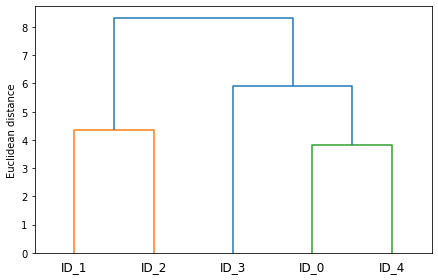

In [19]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import set_link_color_palette
import matplotlib.pyplot as plt
row_dendr = dendrogram(row_clusters, labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()